# Sentiment Analysis NLP Pipeline
This notebook includes:
- Data Ingestion
- Data Validation
- Data Transformation
- Model Training
- Model Evaluation
- Model Saving (`.pkl`)

## Step 1: Data Ingestion

In [1]:
import pandas as pd
# Load training and validation data
train_df = pd.read_csv("/Users/apple/Downloads/Project/Sentiment-Analysis-End-to-End-NLP-Project/research/twitter_training.csv", header=None)
val_df = pd.read_csv("/Users/apple/Downloads/Project/Sentiment-Analysis-End-to-End-NLP-Project/research/twitter_validation.csv", header=None)


In [2]:
train_df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
val_df.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
# Combine training and validation data
df = pd.concat([train_df, val_df], ignore_index=True)
df.columns = ["ID", "Entity", "Sentiment", "Text"]
df = df[["Text", "Sentiment"]]  # Select relevant columns only
df.head()

,Text,Sentiment
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [41]:
df.tail()

,Text,Sentiment
70247,suikoden 2 1⃣ alex kidd miracle world persona ...,Neutral
70248,thank matching fund home depot rw payment 2155...,Positive
70249,late night stream boy come watch warzone run s...,Neutral
70250,toronto art culture capital canada it’s wonder...,Irrelevant
70251,actually good tot bring viewer people got hook...,Irrelevant


In [5]:
df.size

151364

In [6]:
df.Sentiment.value_counts()

Sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Text         686
Sentiment      0
dtype: int64

In [8]:
df.dropna(inplace=True)  # Drop rows with missing values

In [9]:
df.reset_index(drop=True, inplace=True)  # Reset index after dropping rows

In [10]:
df.isnull().sum()  # Check for missing values again

Text         0
Sentiment    0
dtype: int64

In [11]:
df.Sentiment.value_counts()  # Check sentiment distribution again

Sentiment
Negative      22624
Positive      20932
Neutral       18393
Irrelevant    13047
Name: count, dtype: int64

In [12]:
df.shape

(74996, 2)

In [13]:
df.duplicated().sum()  # Check for duplicate rows

4744

In [14]:
df.drop_duplicates(inplace=True)  # Drop duplicate rows
df.reset_index(drop=True, inplace=True)  # Reset index after dropping duplicates
df.duplicated().sum()  # Check for duplicates again

0

In [15]:
df.Sentiment.value_counts()

Sentiment
Negative      21329
Positive      19271
Neutral       17281
Irrelevant    12371
Name: count, dtype: int64

In [16]:
df.shape

(70252, 2)

In [17]:
print("df columns:", df.columns)
print("train_df columns:", train_df.columns)
print("val_df columns:", val_df.columns)

df columns: Index(['Text', 'Sentiment'], dtype='object')
train_df columns: Index([0, 1, 2, 3], dtype='int64')
val_df columns: Index([0, 1, 2, 3], dtype='int64')


## Step 2: Data Cleaning


In [18]:
import re

# Function to remove HTML tags from text
# This function uses a regular expression to remove HTML tags from the text.
# It matches any sequence of characters that starts with '<' and ends with '>', effectively removing all HTML tags.
# It returns the cleaned text without any HTML tags.
# This is useful for preprocessing text data that may contain HTML formatting, ensuring that only the raw text content remains for analysis.

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

df['Text'] = df['Text'].apply(remove_html_tags)
df.head()

,Text,Sentiment
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [19]:
def remove_urls(text):
    # Function to remove URLs from text
    # This regex matches URLs starting with http or https, and also matches www.
    # It removes them from the text.
    # Note: This regex is a simple one and may not cover all edge cases.
    return re.sub(r'http\S+|www\.\S+', '', text)

df['Text'] = df['Text'].apply(remove_urls)
df.head()

,Text,Sentiment
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [20]:
import string

def remove_punctuation(text):
    # Function to remove punctuation from text
    # This function uses str.translate() with str.maketrans() to remove all punctuation characters from the text.
    # It creates a translation table that maps each punctuation character to None, effectively removing them.
    # This is useful for cleaning text data before further processing, such as tokenization or sentiment analysis.
    # string.punctuation contains all common punctuation characters.
    # It is used here to remove punctuation from the text.

    return text.translate(str.maketrans('', '', string.punctuation))

df['Text'] = df['Text'].apply(remove_punctuation)
df.head()

,Text,Sentiment
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you all,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [21]:
import re

def remove_emojis(text):
    # This regex matches most common emojis and symbols
    # It uses Unicode ranges to match various categories of emojis.
    # The regex pattern includes ranges for emoticons, symbols, transport and map symbols, flags, and dingbats.
    # The re.UNICODE flag allows the regex to match Unicode characters.
    # The function replaces matched emojis with an empty string, effectively removing them from the text.
    # This is useful for cleaning text data that may contain emojis, which can interfere with text analysis or sentiment classification.
    # This function is applied to the 'Text' column of the DataFrame to clean the text data.
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Text'] = df['Text'].apply(remove_emojis)
df.head()

,Text,Sentiment
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you all,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [22]:
# Convert all text in the 'Text' column to lowercase
df['Text'] = df['Text'].str.lower()
df.head()

,Text,Sentiment
0,im getting on borderlands and i will murder yo...,Positive
1,i am coming to the borders and i will kill you...,Positive
2,im getting on borderlands and i will kill you all,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [23]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stopwords(text):
    # Split text into words, remove stopwords, and join back to string
    # This function uses the ENGLISH_STOP_WORDS set from sklearn to filter out common English stopwords.
    # It splits the input text into words, checks each word against the stopwords set, and returns a string of words that are not stopwords.
    # This is useful for text preprocessing in natural language processing tasks, such as sentiment analysis or text classification.
    # ENGLISH_STOP_WORDS is a predefined set of common English words that are often removed in text preprocessing.
    return ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

df['Text'] = df['Text'].apply(remove_stopwords)
df.head()

,Text,Sentiment
0,im getting borderlands murder,Positive
1,coming borders kill,Positive
2,im getting borderlands kill,Positive
3,im coming borderlands murder,Positive
4,im getting borderlands 2 murder,Positive


In [24]:
!pip install nltk

In [25]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download WordNet data if not already present
# This step is necessary to use the WordNetLemmatizer for lemmatization.
# It ensures that the required resources for lemmatization are available.
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Lemmatize each word in the text
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['Text'] = df['Text'].apply(lemmatize_text)
df.head()

[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/apple/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Text,Sentiment
0,im getting borderland murder,Positive
1,coming border kill,Positive
2,im getting borderland kill,Positive
3,im coming borderland murder,Positive
4,im getting borderland 2 murder,Positive


## Exploratory Data Analysis (EDA)

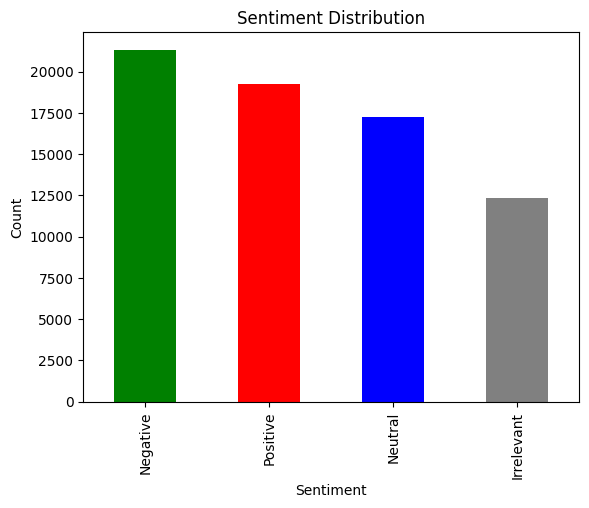

এই গ্রাফটি বিভিন্ন Sentiment (যেমন Positive, Negative, Neutral, Irrelevant) এর ডিস্ট্রিবিউশন দেখায়। এখানে দেখা যাচ্ছে কোন Sentiment-এর সংখ্যা বেশি এবং কোনটি কম।


In [26]:
import matplotlib.pyplot as plt

# Sentiment distribution plot
# Assuming df is a DataFrame with a 'Sentiment' column
# Sample DataFrame creation for demonstration

df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Comments in Bangla
print("এই গ্রাফটি বিভিন্ন Sentiment (যেমন Positive, Negative, Neutral, Irrelevant) এর ডিস্ট্রিবিউশন দেখায়। এখানে দেখা যাচ্ছে কোন Sentiment-এর সংখ্যা বেশি এবং কোনটি কম।")

In [27]:
!pip install wordcloud

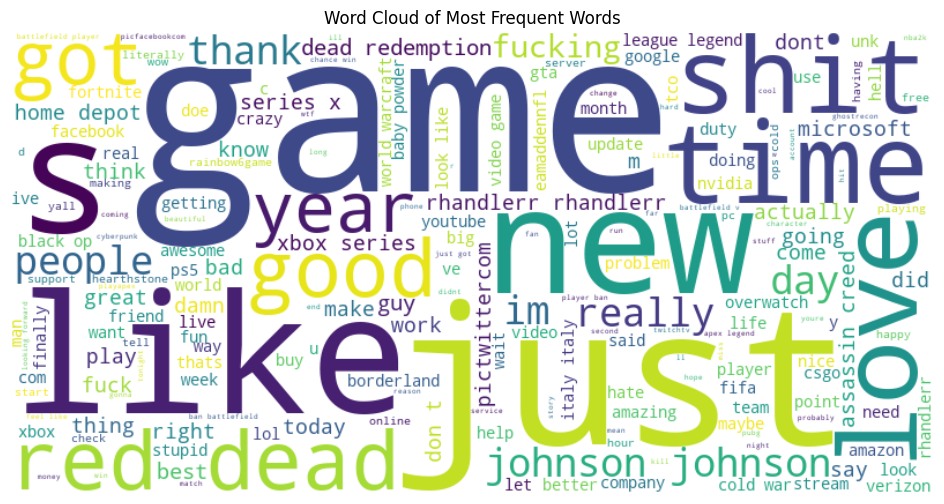

Top 20 frequent words:
game: 10293
just: 6554
like: 4893
2: 4020
im: 3752
play: 3564
good: 3498
love: 3238
really: 3220
new: 3192
time: 3105
johnson: 2856
people: 2731
shit: 2709
3: 2589
best: 2478
’: 2412
player: 2376
year: 2287
got: 2286


In [28]:

from wordcloud import WordCloud
from collections import Counter

import matplotlib.pyplot as plt

# Combine all text for word cloud
text = ' '.join(df['Text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=ENGLISH_STOP_WORDS).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

# Show top 20 frequent words

words = text.split()
word_counts = Counter(words)
common_words = word_counts.most_common(20)
print("Top 20 frequent words:")
for word, count in common_words:
    print(f"{word}: {count}")

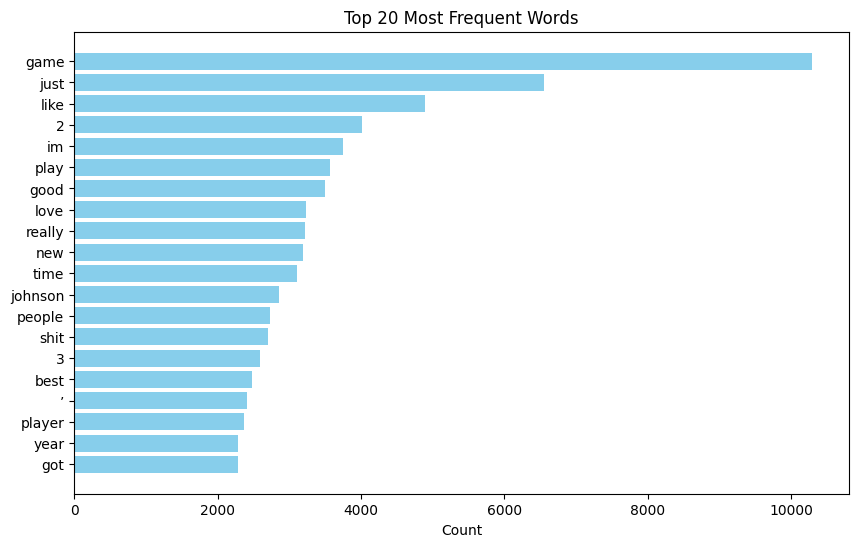

In [29]:
# Alternative style: Plotting word frequencies as a horizontal bar chart

import matplotlib.pyplot as plt

# Get top 20 most common words
top_words, top_counts = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.barh(top_words, top_counts, color='skyblue')
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()  # Highest count on top
plt.show()

In [30]:
df.head()

,Text,Sentiment
0,im getting borderland murder,Positive
1,coming border kill,Positive
2,im getting borderland kill,Positive
3,im coming borderland murder,Positive
4,im getting borderland 2 murder,Positive


In [31]:
df.head()

,Text,Sentiment
0,im getting borderland murder,Positive
1,coming border kill,Positive
2,im getting borderland kill,Positive
3,im coming borderland murder,Positive
4,im getting borderland 2 murder,Positive


In [32]:
from sklearn.model_selection import train_test_split

# Use the cleaned and preprocessed 'df' DataFrame
X = df['Text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 56201
Test size: 14051


In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Initialize TfidfVectorizer
# max_features can be adjusted based on the dataset size and complexity
tfidf = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform both training and test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Try multiple models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "MultinomialNB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Linear SVC": LinearSVC(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

best_model = None
best_acc = 0
results = {}

for name, model in models.items():
    # Train the model using the TF-IDF transformed data
    model.fit(X_train_tfidf, y_train)
    # Predict using the TF-IDF transformed test data
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_model = model

print("\nBest Model:", type(best_model).__name__, "with accuracy:", best_acc)
print("Classification Report:\n", classification_report(y_test, best_model.predict(X_test_tfidf)))

Logistic Regression Accuracy: 0.6929
MultinomialNB Accuracy: 0.6418
Random Forest Accuracy: 0.8868


/opt/anaconda3/envs/nlpproject1/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC Accuracy: 0.7116
Gradient Boosting Accuracy: 0.5208

Best Model: RandomForestClassifier with accuracy: 0.8867696249377268
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.92      0.82      0.87      2474
    Negative       0.90      0.92      0.91      4266
     Neutral       0.85      0.89      0.87      3456
    Positive       0.88      0.89      0.89      3855

    accuracy                           0.89     14051
   macro avg       0.89      0.88      0.88     14051
weighted avg       0.89      0.89      0.89     14051



In [34]:
# prompt: can you use Optional: Deep Learning — LSTM/Transformer based models

!pip install tensorflow keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Prepare data for deep learning models
# Use the cleaned 'X' and 'y' data from previous steps

# Tokenize the text data
# Define maximum number of words to keep in vocabulary
max_words = 10000
# Define maximum sequence length
max_len = 128

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding for categorical crossentropy loss
y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded)
y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded)

# Build LSTM Model
embedding_dim = 16
lstm_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(32)),
    Dense(24, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer with number of classes
])

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

# Train LSTM Model
num_epochs = 5
history_lstm = lstm_model.fit(X_train_padded, y_train_categorical, epochs=num_epochs, validation_data=(X_test_padded, y_test_categorical), verbose=1)

# Evaluate LSTM Model
loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test_padded, y_test_categorical, verbose=0)
print(f"LSTM Model Accuracy: {accuracy_lstm:.4f}")

# Make predictions with LSTM and show classification report
y_pred_lstm = np.argmax(lstm_model.predict(X_test_padded), axis=-1)
y_pred_lstm_labels = label_encoder.inverse_transform(y_pred_lstm)
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm_labels))


# Build Transformer Model (Simplified)
# This is a basic example. More complex Transformer models use Attention layers.
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dense, Input, GlobalAveragePooling1D

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    return x + res

input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(max_words, embedding_dim)(input_layer)

transformer_block = transformer_encoder(embedding_layer, head_size=16, num_heads=2, ff_dim=16, dropout=0.1)
transformer_block = transformer_encoder(transformer_block, head_size=16, num_heads=2, ff_dim=16, dropout=0.1)

x = GlobalAveragePooling1D()(transformer_block)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.1)(x)
output_layer = Dense(len(label_encoder.classes_), activation="softmax")(x)

transformer_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

transformer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
transformer_model.summary()

# Train Transformer Model
history_transformer = transformer_model.fit(X_train_padded, y_train_categorical, epochs=num_epochs, validation_data=(X_test_padded, y_test_categorical), verbose=1)

# Evaluate Transformer Model
loss_transformer, accuracy_transformer = transformer_model.evaluate(X_test_padded, y_test_categorical, verbose=0)
print(f"Transformer Model Accuracy: {accuracy_transformer:.4f}")

# Make predictions with Transformer and show classification report
y_pred_transformer = np.argmax(transformer_model.predict(X_test_padded), axis=-1)
y_pred_transformer_labels = label_encoder.inverse_transform(y_pred_transformer)
print("Transformer Classification Report:\n", classification_report(y_test, y_pred_transformer_labels))

# Compare results
print("\nComparison of Models:")
print(f"Logistic Regression Accuracy: {results['Logistic Regression']:.4f}")
print(f"MultinomialNB Accuracy: {results['MultinomialNB']:.4f}")
print(f"Random Forest Accuracy: {results['Random Forest']:.4f}")
print(f"Linear SVC Accuracy: {results['Linear SVC']:.4f}")
print(f"Gradient Boosting Accuracy: {results['Gradient Boosting']:.4f}")
print(f"LSTM Model Accuracy: {accuracy_lstm:.4f}")
print(f"Transformer Model Accuracy: {accuracy_transformer:.4f}")


2025-06-09 10:38:34.955053: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/nlpproject1/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 146s 80ms/step - accuracy: 0.4502 - loss: 1.1973 - val_accuracy: 0.6496 - val_loss: 0.8652
Epoch 2/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 139s 79ms/step - accuracy: 0.7008 - loss: 0.7850 - val_accuracy: 0.7401 - val_loss: 0.7036
Epoch 3/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 140s 80ms/step - accuracy: 0.7932 - loss: 0.5858 - val_accuracy: 0.7746 - val_loss: 0.6237
Epoch 4/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 146s 82ms/step - accuracy: 0.8369 - loss: 0.4709 - val_accuracy: 0.7847 - val_loss: 0.6018
Epoch 5/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 143s 82ms/step - accuracy: 0.8537 - loss: 0.4139 - val_accuracy: 0.8004 - val_loss: 0.5712
LSTM Model Accuracy: 0.8004
440/440 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.80      0.70      0.75      2474
    Negative       0.80      0.87      0.83      4266
     Neutral       0.82      0.76      0.79      3456
    Positive       0.79 

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 128, 16)   │    160,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 128, 16)   │         32 │ embedding_1[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 128, 16)   │      2,160 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128, 16)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128, 16)   │          0 │ dropout_2[0][0],  │
│                     │                   │            │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 128, 16)   │         32 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128, 16)   │        272 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128, 16)   │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 128, 16)   │          0 │ dropout_3[0][0],  │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 128, 16)   │         32 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 128, 16)   │      2,160 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128, 16)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 128, 16)   │          0 │ dropout_5[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 128, 16)   │         32 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128, 16)   │        272 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 128, 16)   │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 128, 16)   │          0 │ dropout_6[0][0],  │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 16)        │          0 │ add_3[0][0]     

 Total params: 165,416 (646.16 KB)

 Trainable params: 165,416 (646.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 266s 145ms/step - accuracy: 0.4827 - loss: 1.1639 - val_accuracy: 0.6892 - val_loss: 0.7965
Epoch 2/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 220s 125ms/step - accuracy: 0.7620 - loss: 0.6420 - val_accuracy: 0.7481 - val_loss: 0.6657
Epoch 3/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 280s 159ms/step - accuracy: 0.8188 - loss: 0.4900 - val_accuracy: 0.7744 - val_loss: 0.6398
Epoch 4/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 288s 164ms/step - accuracy: 0.8433 - loss: 0.4185 - val_accuracy: 0.7779 - val_loss: 0.6580
Epoch 5/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 201s 114ms/step - accuracy: 0.8632 - loss: 0.3631 - val_accuracy: 0.7859 - val_loss: 0.6448
Transformer Model Accuracy: 0.7859
440/440 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step
Transformer Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.79      0.72      0.75      2474
    Negative       0.78      0.86      0.82      4266
     Neutral       0.84      0.71      0.77      3456
    

In [35]:
# prompt: take random forest  classifier and get the accuracy

# Access the accuracy for the Random Forest model from the `results` dictionary
random_forest_accuracy = results["Random Forest"]

# Print the accuracy
print(f"Random Forest Classifier Accuracy: {random_forest_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.8868


In [36]:
# prompt: Train the model on training data

# Identify the model with the highest accuracy among the trained models
best_accuracy = 0
best_model_name = None

for model_name, accuracy in results.items():
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

# Compare with deep learning models
if accuracy_lstm > best_accuracy:
    best_accuracy = accuracy_lstm
    best_model_name = "LSTM Model"

if accuracy_transformer > best_accuracy:
    best_accuracy = accuracy_transformer
    best_model_name = "Transformer Model"

print(f"\nOverall Best Model is {best_model_name} with an accuracy of {best_accuracy:.4f}")

# If the best model is one of the scikit-learn models, access it from the 'models' dictionary
# If it's a deep learning model, access it directly (lstm_model or transformer_model)
if best_model_name in models:
    final_best_model = models[best_model_name]
elif best_model_name == "LSTM Model":
    final_best_model = lstm_model
elif best_model_name == "Transformer Model":
    final_best_model = transformer_model

# Now 'final_best_model' holds the trained model with the highest accuracy

# ## Step 5: Model Saving

import pickle

# Save the best traditional model (if it's the best)
if best_model_name in models:
    # Save the best traditional model
    model_filename = f"{best_model_name.replace(' ', '_')}_sentiment_model.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump(final_best_model, f)
    print(f"\nBest traditional model '{best_model_name}' saved as '{model_filename}'")

    # Also save the TfidfVectorizer fitted on the data
    tfidf_filename = "tfidf_vectorizer.pkl"
    with open(tfidf_filename, 'wb') as f:
        pickle.dump(tfidf, f)
    print(f"TfidfVectorizer saved as '{tfidf_filename}'")

elif best_model_name in ["LSTM Model", "Transformer Model"]:
    # Save the best deep learning model in Keras format
    model_filename = f"{best_model_name.replace(' ', '_')}_sentiment_model.h5"
    final_best_model.save(model_filename)
    print(f"\nBest deep learning model '{best_model_name}' saved as '{model_filename}'")

    # Also save the Tokenizer used for deep learning
    tokenizer_filename = "tokenizer.pkl"
    with open(tokenizer_filename, 'wb') as f:
        pickle.dump(tokenizer, f)
    print(f"Tokenizer saved as '{tokenizer_filename}'")

    # Save the LabelEncoder
    label_encoder_filename = "label_encoder.pkl"
    with open(label_encoder_filename, 'wb') as f:
        pickle.dump(label_encoder, f)
    print(f"LabelEncoder saved as '{label_encoder_filename}'")




Overall Best Model is Random Forest with an accuracy of 0.8868

Best traditional model 'Random Forest' saved as 'Random_Forest_sentiment_model.pkl'
TfidfVectorizer saved as 'tfidf_vectorizer.pkl'



Evaluation for the Best Model (Random Forest):
Accuracy: 0.8868

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.92      0.82      0.87      2474
    Negative       0.90      0.92      0.91      4266
     Neutral       0.85      0.89      0.87      3456
    Positive       0.88      0.89      0.89      3855

    accuracy                           0.89     14051
   macro avg       0.89      0.88      0.88     14051
weighted avg       0.89      0.89      0.89     14051



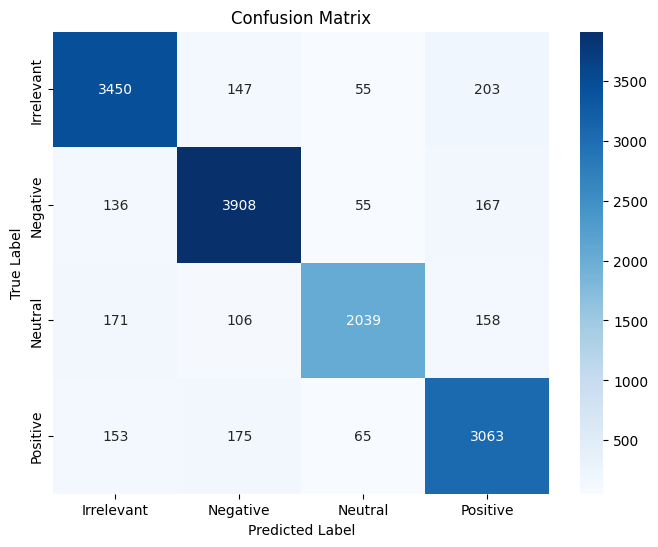

In [37]:
# prompt: Test data te evaluate kora:
# Accuracy
# Precision, Recall, F1-score
# Confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Input
from tensorflow.keras.layers import Embedding, Dense, Dropout
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Make predictions using the best performing model on the test set
# Ensure the predictions are in the correct format for evaluation metrics
# For scikit-learn models, predict directly on the transformed test data
if best_model_name in models:
    # If the best model is a scikit-learn model, use TF-IDF transformed data
    y_pred_final = final_best_model.predict(X_test_tfidf)
    # y_true is y_test for scikit-learn models
    y_true_final = y_test
elif best_model_name == "LSTM Model":
    # If the best model is LSTM, use padded test sequences
    y_pred_raw = final_best_model.predict(X_test_padded)
    y_pred_final = label_encoder.inverse_transform(np.argmax(y_pred_raw, axis=-1))
    # y_true for deep learning models needs to be inverse transformed if originally encoded
    y_true_final = y_test
elif best_model_name == "Transformer Model":
    # If the best model is Transformer, use padded test sequences
    y_pred_raw = final_best_model.predict(X_test_padded)
    y_pred_final = label_encoder.inverse_transform(np.argmax(y_pred_raw, axis=-1))
    # y_true for deep learning models needs to be inverse transformed if originally encoded
    y_true_final = y_test

# Evaluate the best model
print(f"\nEvaluation for the Best Model ({best_model_name}):")

# 1. Accuracy
accuracy = accuracy_score(y_true_final, y_pred_final)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_true_final, y_pred_final))

# 3. Confusion Matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_true_final, y_pred_final, labels=y_true_final.unique())

# Get the unique class labels to use for plotting
classes = y_true_final.unique()
classes.sort() # Sort the labels alphabetically or numerically

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
gggggggggg

# Model Improvement

In [38]:
'''
# prompt: try Hyperparameter tuning (GridSearchCV, RandomizedSearchCV)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from sklearn.metrics import confusion_matrix # Import confusion_matrix
import warnings
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D # Import necessary layers
from tensorflow.keras.layers import Embedding, Dense, Dropout, Input # Import Input from tensorflow.keras.layers
import tensorflow as tf # Re-import tensorflow for clarity
import numpy as np # Re-import numpy for clarity

# Define parameter grids for GridSearch and RandomizedSearch
# These grids are examples and should be tuned based on the specific model and dataset
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization parameter for Logistic Regression
param_grid_nb = {'alpha': [0.1, 0.5, 1.0]}  # Smoothing parameter for Multinomial Naive Bayes
param_grid_rf = {'n_estimators': [100, 200, 500], 'max_depth': [None, 10, 20, 30]} # Number of trees and max depth for Random Forest
param_grid_svc = {'C': [0.01, 0.1, 1, 10]} # Regularization parameter for Linear SVC
param_grid_gb = {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.5]} # Number of trees and learning rate for Gradient Boosting

# You can create more extensive grids for Randomized Search if needed

# Perform GridSearchCV on some models
print("\n--- Performing GridSearchCV ---")

# Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=3, scoring='accuracy')
grid_search_lr.fit(X_train_tfidf, y_train)
print(f"\nGridSearchCV Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"GridSearchCV Best Accuracy for Logistic Regression: {grid_search_lr.best_score_:.4f}")
results["Logistic Regression (Tuned)"] = accuracy_score(y_test, grid_search_lr.predict(X_test_tfidf))
print(f"Logistic Regression (Tuned) Test Accuracy: {results['Logistic Regression (Tuned)']:.4f}")

# Multinomial Naive Bayes
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=3, scoring='accuracy')
grid_search_nb.fit(X_train_tfidf, y_train)
print(f"\nGridSearchCV Best Parameters for MultinomialNB: {grid_search_nb.best_params_}")
print(f"GridSearchCV Best Accuracy for MultinomialNB: {grid_search_nb.best_score_:.4f}")
results["MultinomialNB (Tuned)"] = accuracy_score(y_test, grid_search_nb.predict(X_test_tfidf))
print(f"MultinomialNB (Tuned) Test Accuracy: {results['MultinomialNB (Tuned)']:.4f}")


# Perform RandomizedSearchCV on other models (or additional tuning)
print("\n--- Performing RandomizedSearchCV ---")

# Random Forest
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, n_iter=5, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_tfidf, y_train)
print(f"\nRandomizedSearchCV Best Parameters for Random Forest: {random_search_rf.best_params_}")
print(f"RandomizedSearchCV Best Accuracy for Random Forest: {random_search_rf.best_score_:.4f}")
results["Random Forest (Tuned)"] = accuracy_score(y_test, random_search_rf.predict(X_test_tfidf))
print(f"Random Forest (Tuned) Test Accuracy: {results['Random Forest (Tuned)']:.4f}")


# Linear SVC
random_search_svc = RandomizedSearchCV(LinearSVC(max_iter=1000, random_state=42), param_grid_svc, n_iter=4, cv=3, scoring='accuracy', random_state=42)
random_search_svc.fit(X_train_tfidf, y_train)
print(f"\nRandomizedSearchCV Best Parameters for Linear SVC: {random_search_svc.best_params_}")
print(f"RandomizedSearchCV Best Accuracy for Linear SVC: {random_search_svc.best_score_:.4f}")
results["Linear SVC (Tuned)"] = accuracy_score(y_test, random_search_svc.predict(X_test_tfidf))
print(f"Linear SVC (Tuned) Test Accuracy: {results['Linear SVC (Tuned)']:.4f}")


# Gradient Boosting
random_search_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, n_iter=5, cv=3, scoring='accuracy', random_state=42)
random_search_gb.fit(X_train_tfidf, y_train)
print(f"\nRandomizedSearchCV Best Parameters for Gradient Boosting: {random_search_gb.best_params_}")
print(f"RandomizedSearchCV Best Accuracy for Gradient Boosting: {random_search_gb.best_score_:.4f}")
results["Gradient Boosting (Tuned)"] = accuracy_score(y_test, random_search_gb.predict(X_test_tfidf))
print(f"Gradient Boosting (Tuned) Test Accuracy: {results['Gradient Boosting (Tuned)']:.4f}")


# Add the deep learning model accuracies to the results dictionary for comparison
results["LSTM Model"] = accuracy_lstm
results["Transformer Model"] = accuracy_transformer

# Find the overall best model after tuning
best_accuracy = 0
best_model_name = None

print("\n--- Comparison of Tuned and Untuned Models ---")
for model_name, accuracy in results.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

print(f"\nOverall Best Model is {best_model_name} with an accuracy of {best_accuracy:.4f}")

# Update the final_best_model variable to reflect the best model found after tuning
if best_model_name == "Logistic Regression (Tuned)":
    final_best_model = grid_search_lr.best_estimator_
elif best_model_name == "MultinomialNB (Tuned)":
    final_best_model = grid_search_nb.best_estimator_
elif best_model_name == "Random Forest (Tuned)":
    final_best_model = random_search_rf.best_estimator_
elif best_model_name == "Linear SVC (Tuned)":
    final_best_model = random_search_svc.best_estimator_
elif best_model_name == "Gradient Boosting (Tuned)":
    final_best_model = random_search_gb.best_estimator_
elif best_model_name == "LSTM Model":
    final_best_model = lstm_model
elif best_model_name == "Transformer Model":
    final_best_model = transformer_model
# Add other tuned models here if you tuned more

# Save the best model found after hyperparameter tuning
# The saving logic from Step 5 needs to be adapted here to save the newly found 'final_best_model'

# Save the best model found after hyperparameter tuning
if best_model_name in ["Logistic Regression (Tuned)", "MultinomialNB (Tuned)", "Random Forest (Tuned)", "Linear SVC (Tuned)", "Gradient Boosting (Tuned)"]:
    # Save the best traditional model
    model_filename = f"{best_model_name.replace(' ', '_').replace('(', '').replace(')', '')}_sentiment_model.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump(final_best_model, f)
    print(f"\nBest traditional model '{best_model_name}' saved as '{model_filename}'")

    # Also save the TfidfVectorizer fitted on the data
    tfidf_filename = "tfidf_vectorizer.pkl"
    with open(tfidf_filename, 'wb') as f:
        pickle.dump(tfidf, f)
    print(f"TfidfVectorizer saved as '{tfidf_filename}'")

elif best_model_name in ["LSTM Model", "Transformer Model"]:
    # Save the best deep learning model in Keras format
    model_filename = f"{best_model_name.replace(' ', '_').replace('(', '').replace(')', '')}_sentiment_model.h5"
    final_best_model.save(model_filename)
    print(f"\nBest deep learning model '{best_model_name}' saved as '{model_filename}'")

    # Also save the Tokenizer used for deep learning
    tokenizer_filename = "tokenizer.pkl"
    with open(tokenizer_filename, 'wb') as f:
        pickle.dump(tokenizer, f)
    print(f"Tokenizer saved as '{tokenizer_filename}'")

    # Save the LabelEncoder
    label_encoder_filename = "label_encoder.pkl"
    with open(label_encoder_filename, 'wb') as f:
        pickle.dump(label_encoder, f)
    print(f"LabelEncoder saved as '{label_encoder_filename}'")

# Evaluate the final best model on the test set again
print(f"\n--- Final Evaluation for the Best Model ({best_model_name}) ---")

# Make predictions using the final best performing model on the test set
# Ensure the predictions are in the correct format for evaluation metrics
if best_model_name in ["Logistic Regression (Tuned)", "MultinomialNB (Tuned)", "Random Forest (Tuned)", "Linear SVC (Tuned)", "Gradient Boosting (Tuned)"]:
    # If the best model is a scikit-learn model, use TF-IDF transformed data
    y_pred_final = final_best_model.predict(X_test_tfidf)
    # y_true is y_test for scikit-learn models
    y_true_final = y_test
elif best_model_name == "LSTM Model":
    # If the best model is LSTM, use padded test sequences
    y_pred_raw = final_best_model.predict(X_test_padded)
    y_pred_final = label_encoder.inverse_transform(np.argmax(y_pred_raw, axis=-1))
    # y_true for deep learning models needs to be inverse transformed if originally encoded
    y_true_final = y_test
elif best_model_name == "Transformer Model":
    # If the best model is Transformer, use padded test sequences
    y_pred_raw = final_best_model.predict(X_test_padded)
    y_pred_final = label_encoder.inverse_transform(np.argmax(y_pred_raw, axis=-1))
    # y_true for deep learning models needs to be inverse transformed if originally encoded
    y_true_final = y_test

# 1. Accuracy
accuracy = accuracy_score(y_true_final, y_pred_final)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_true_final, y_pred_final))

# 3. Confusion Matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_true_final, y_pred_final, labels=y_true_final.unique())

# Get the unique class labels to use for plotting
classes = y_true_final.unique()
classes.sort() # Sort the labels alphabetically or numerically

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
'''

'\n# prompt: try Hyperparameter tuning (GridSearchCV, RandomizedSearchCV)\n\nfrom sklearn.model_selection import GridSearchCV, RandomizedSearchCV\nimport numpy as np\nimport seaborn as sns\nfrom sklearn.preprocessing import LabelEncoder # Import LabelEncoder\nfrom sklearn.metrics import confusion_matrix # Import confusion_matrix\nimport warnings\nfrom tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D # Import necessary layers\nfrom tensorflow.keras.layers import Embedding, Dense, Dropout, Input # Import Input from tensorflow.keras.layers\nimport tensorflow as tf # Re-import tensorflow for clarity\nimport numpy as np # Re-import numpy for clarity\n\n# Define parameter grids for GridSearch and RandomizedSearch\n# These grids are examples and should be tuned based on the specific model and dataset\nparam_grid_lr = {\'C\': [0.01, 0.1, 1, 10, 100]}  # Regularization parameter for Logistic Regression\nparam_grid_nb = {\'alpha\': [0.1, 0.5, 1.0]}  #

In [39]:
df.Sentiment.value_counts()

Sentiment
Negative      21329
Positive      19271
Neutral       17281
Irrelevant    12371
Name: count, dtype: int64

## Step 6: Save Model and Vectorizer

In [40]:
import pickle

# Save model
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved.")

Model and vectorizer saved.
